In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from starfish.set import settings

In [3]:
def var_filter(fisher,lcdm,neff_fixed):
    df=fisher.copy()
    if lcdm:
        df=df.drop('w0',axis=0)
        df=df.drop('w0',axis=1)
        df=df.drop('wa',axis=0)
        df=df.drop('wa',axis=1)
    if neff_fixed:
        df=df.drop('N_eff',axis=0)
        df=df.drop('N_eff',axis=1)

    return df

# JPAS ELG + PFS ELG

In [4]:
JPAS_ELG=var_filter(pd.read_excel('../data/ELG/fisher.xlsx',header=0,index_col=0),lcdm=True,neff_fixed=True)
PFS_ELG=var_filter(pd.read_excel('../data/PFS/fisher.xlsx',header=0,index_col=0),lcdm=True,neff_fixed=True)

In [5]:
cov=pd.DataFrame(np.linalg.inv(JPAS_ELG.values),index=JPAS_ELG.index,columns=JPAS_ELG.columns)
JPAS_ELG_marg=np.linalg.inv(cov.iloc[:settings.cosmo_num,:settings.cosmo_num].values)

In [6]:
cov=pd.DataFrame(np.linalg.inv(PFS_ELG.values),index=PFS_ELG.index,columns=PFS_ELG.columns)
PFS_ELG_marg=np.linalg.inv(cov.iloc[:settings.cosmo_num,:settings.cosmo_num].values)

In [7]:
from getdist import plots
from getdist.gaussian_mixtures import GaussianND

gauss = []
for f in [PFS_ELG_marg,JPAS_ELG_marg,PFS_ELG_marg+JPAS_ELG_marg]:
    g = GaussianND(settings.cosmo_value, f, is_inv_cov=True, names=settings.var_exp)
    g.paramNames.names[-1].name = r"$\sum m_{\nu,\mathrm{eff}}\;[\mathrm{eV}]$"
    g.paramNames.names[-1].label = ""
    g.names = settings.var_exp
    gauss.append(g)

In [8]:
import seaborn as sns
palette=sns.color_palette(['plum','#1F77B4','darkcyan'])
palette

[(0.8666666666666667, 0.6274509803921569, 0.8666666666666667),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.0, 0.5450980392156862, 0.5450980392156862)]

In [9]:
orders=[r'$h$',r'$\Omega_\mathrm{m,0}$',r'$\sum m_{\nu,\mathrm{eff}}\;[\mathrm{eV}]$',]
m=dict(zip(settings.var_exp,settings.cosmo_value))

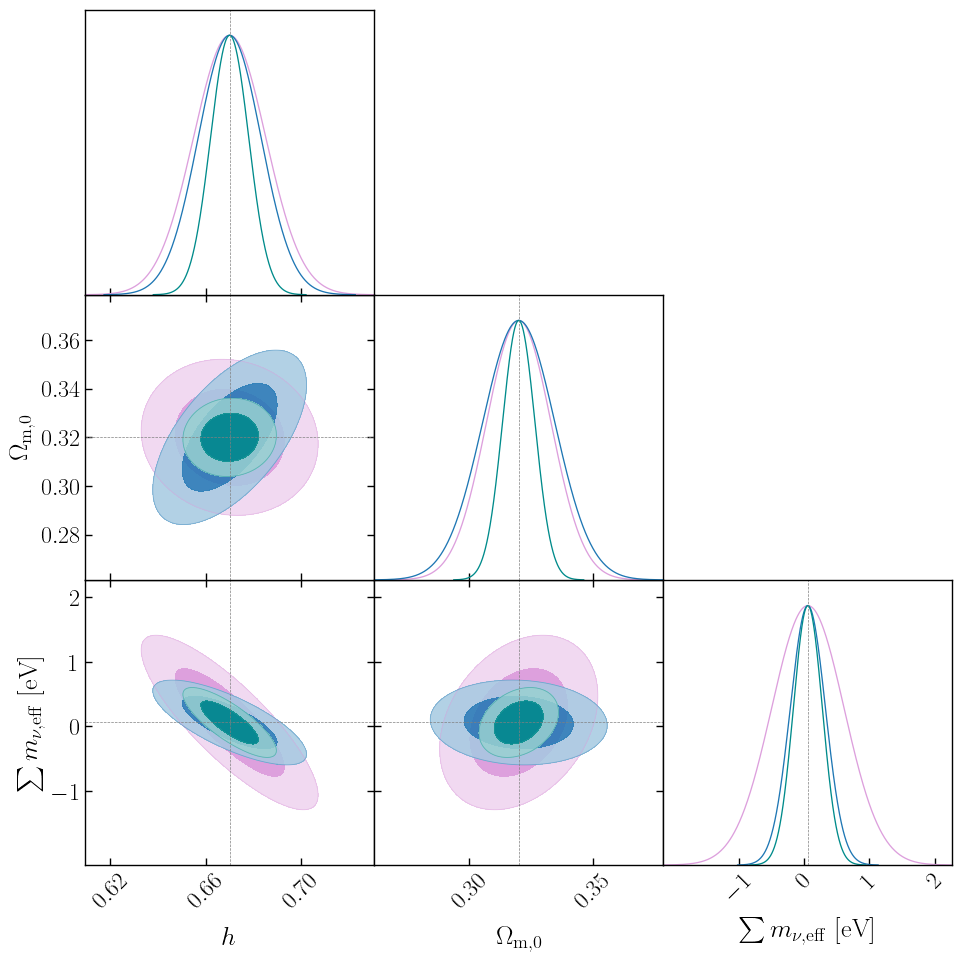

In [10]:
sns.set_context('paper',font_scale=2)
ploter=plots.get_subplot_plotter(width_inch=10,rc_sizes=True)
ploter.settings.tight_layout=True
ploter.settings.axis_tick_x_rotation=45
ploter.settings.figure_legend_frame=False
ploter.triangle_plot(
    gauss,
    params=orders,
    filled=True,
    markers=m,
    marker_args={'color':'gray'},
    legend_labels=[],
    contour_colors=palette,
    contour_ls='-',
    legend_loc='upper right')

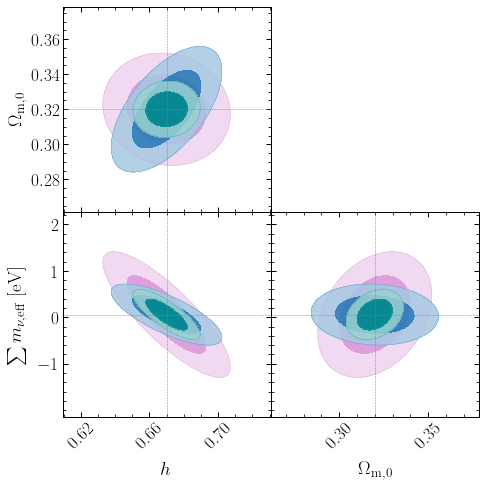

In [11]:
ploter.fig.set_dpi(72)
ploter.fig.align_labels()
for ax in ploter.fig.axes:
    ax.minorticks_on()
    ax.tick_params(which='major',length=5)
    ax.tick_params(which='minor',length=3)
y=len(orders)
axes=[]
start=0
for x in range(len(orders)):
    axes.append(ploter.fig.axes[start:start+y])
    start+=y
    y-=1
for col in axes:
    col[-1].set_visible(False)
ploter.fig.subplots_adjust(wspace=0.,hspace=0.)
ploter.fig

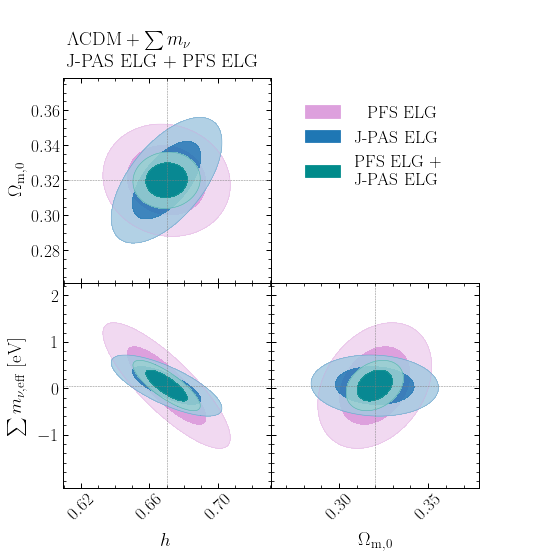

In [12]:
from matplotlib.patches import Patch
p1=Patch(color=palette[0],label='PFS ELG')
p2=Patch(color=palette[1],label='J-PAS ELG')
p3=Patch(color=palette[2],label='PFS ELG +\nJ-PAS ELG')
l=ploter.fig.legend(handles=[p1,p2,p3],loc=(0.55,0.65),frameon=False)
l.get_texts()[0].set_position((13,0))
ploter.fig.text(0.11,0.73,r'$\Lambda\mathrm{CDM}+\sum m_\nu$')
ploter.fig.text(0.11,0.7,'J-PAS ELG + PFS ELG')
ploter.fig

In [13]:
ploter.fig.savefig('../fig/jelg+pelg-all-lcdm-fixed.pdf',bbox_inches='tight')